In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sci378.stats import *

Version:  0.0.13


- MCMC Markov Chain Monte Carlo

$$
P(\mu | \text{data})
$$

$$
P(\mu | \text{data}) \sim P(\text{data} | \mu) \cdot P(\mu)
$$

- Likelihood function

$$
P(\text{data}|\mu)
$$

- $x_i$ - data points
- $\mu$ - true value

$$
x_i \sim \mu + \text{noise}
$$

$$
P(x_i | \mu) \sim \text{Normal}(\mu, \sigma)
$$

- independent noise (1 data point is independent of the others)
- normally distibuted noise
- known standard dev ($\sigma$)
- uniform priors

$$
P(\mu | {x_i}) \sim \text{Normal}(\bar{x},\sigma/\sqrt{N})
$$

In [5]:
(0.5)**2000

0.0

In [6]:
2000*log10(0.5)

-602.0599913279624

In [7]:
def lnlike(data,μ):
    x=data
    return lognormalpdf(x,μ,σ)
    

In [12]:
data=array([12.0,14,16])
σ=1. # known
model = MCMCModel(data, lnlike,
                 μ=Uniform(-50,50),
                 )

Sampling Prior...
Done.
0.26 s
Running MCMC 1/3...
Done.
1.89 s
Running MCMC 2/3...
Done.
1.88 s
Running MCMC 3/3...
Done.
1.88 s


<Figure size 720x576 with 0 Axes>

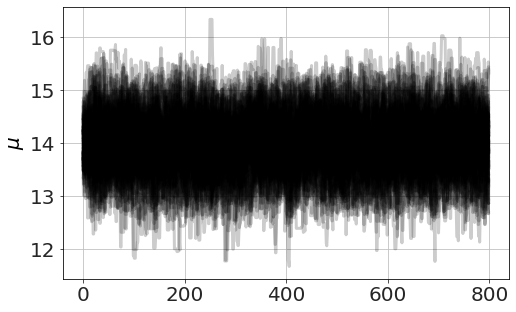

In [13]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

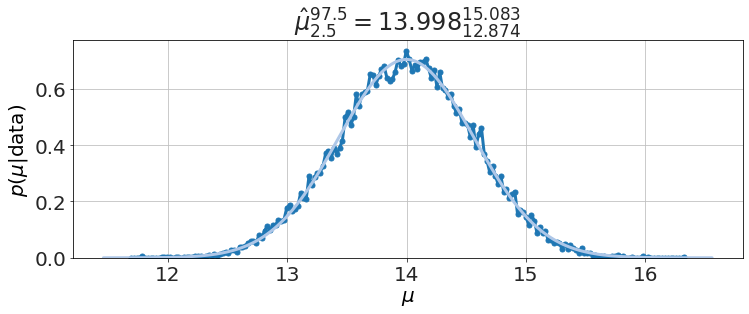

In [14]:
model.plot_distributions()

In [15]:
model.P('μ>15')

0.03625

what if the $\sigma$ is not known?

In [19]:
def lnlike(data,μ,σ):
    x=data
    return lognormalpdf(x,μ,σ)
    

In [20]:
data=array([12.0,14,16])
model = MCMCModel(data, lnlike,
                  μ=Uniform(-50,50),
                  σ=Jeffreys(),
                 )

Sampling Prior...
Done.
0.40 s
Running MCMC 1/3...
Done.
2.46 s
Running MCMC 2/3...
Done.
2.49 s
Running MCMC 3/3...
Done.
2.54 s


<Figure size 720x576 with 0 Axes>

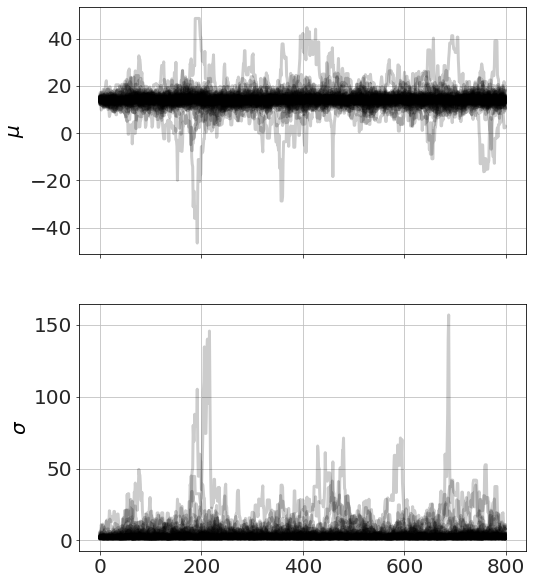

In [21]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

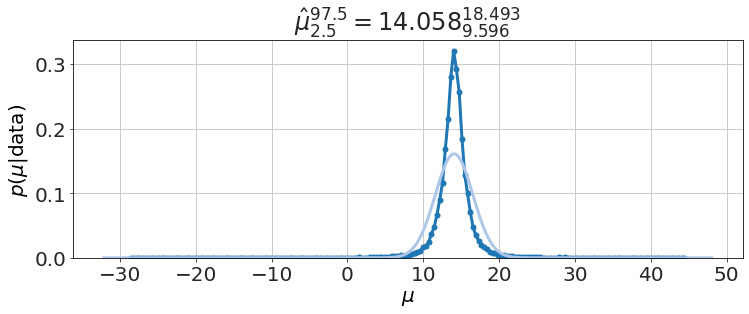

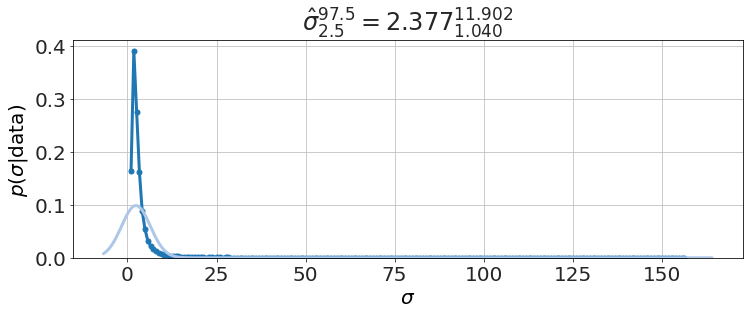

In [22]:
model.plot_distributions()

# Estimate a proportion

- data: $h$, $N$
- true: measure between 0 and 1 on how biased is.  $\theta$, $\theta=0.5$ fair, $\theta=0$ 1-tailed coin, ....

$$
P(\theta | h,N) \sim Bernoulli(\theta,h,N)
$$

In [23]:
def lnlike(data,θ):
    h,N=data
    return logbernoullipdf(θ,h,N)

In [24]:
data=3,12
model=MCMCModel(data,lnlike,
               θ=Uniform(0,1),
               )

Sampling Prior...
Done.
0.25 s
Running MCMC 1/3...
Done.
1.42 s
Running MCMC 2/3...
Done.
1.40 s
Running MCMC 3/3...
Done.
1.43 s


<Figure size 720x576 with 0 Axes>

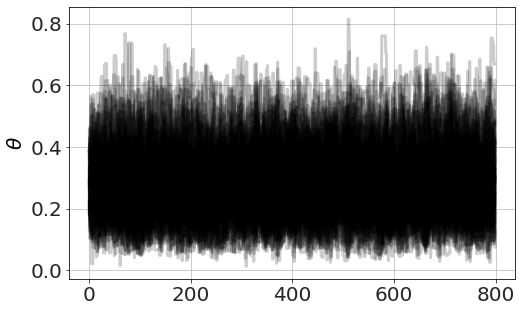

In [25]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

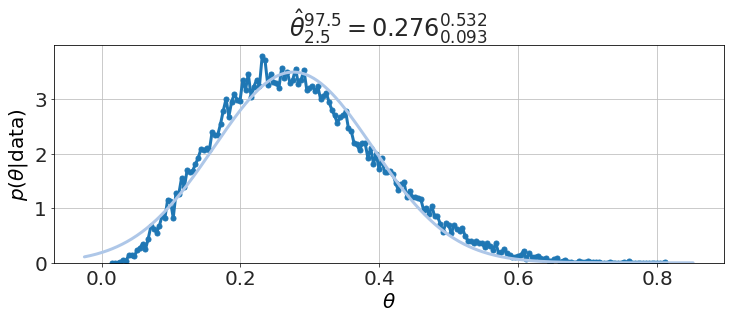

In [26]:
model.plot_distributions()

In [27]:
model.P('θ>0.5')

0.04305

# Comparing two data sets

In [28]:
data1=array([10,11,12.])
data2=array([12,14.0,16])

In [29]:
def lnlike(data,μ1,σ1,μ2,σ2):
    x1,x2=data
    return lognormalpdf(x1,μ1,σ1)+lognormalpdf(x2,μ2,σ2)
    

Sampling Prior...
Done.
0.58 s
Running MCMC 1/3...
Done.
3.69 s
Running MCMC 2/3...
Done.
3.76 s
Running MCMC 3/3...
Done.
3.78 s


<Figure size 720x576 with 0 Axes>

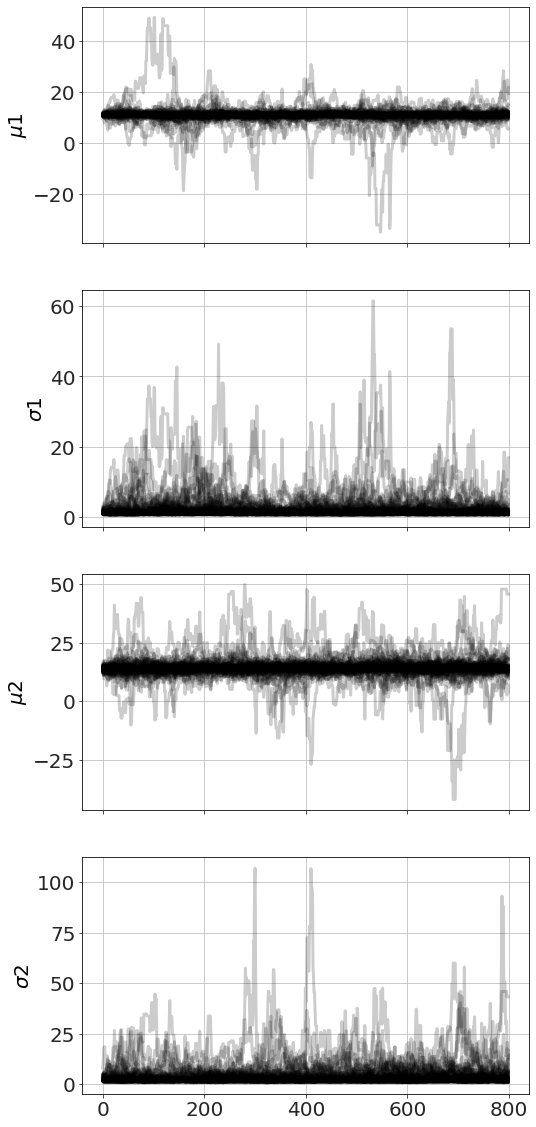

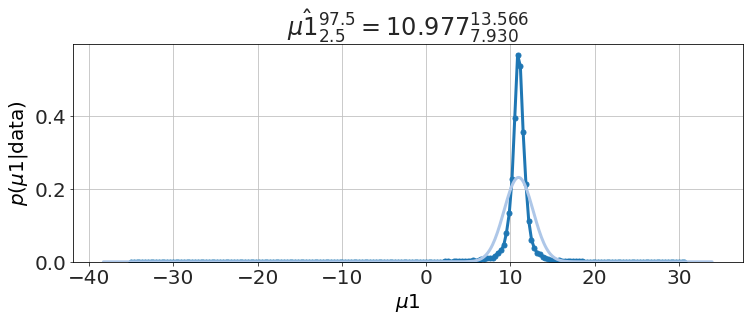

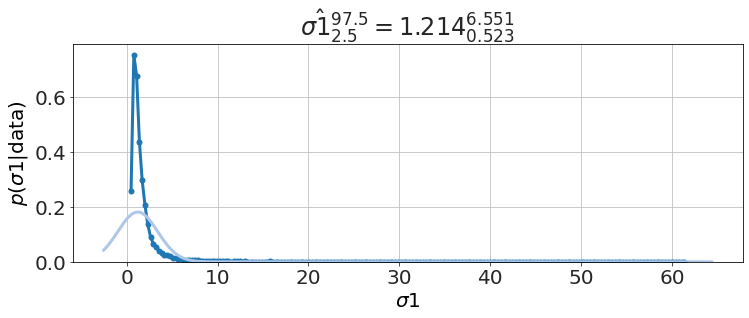

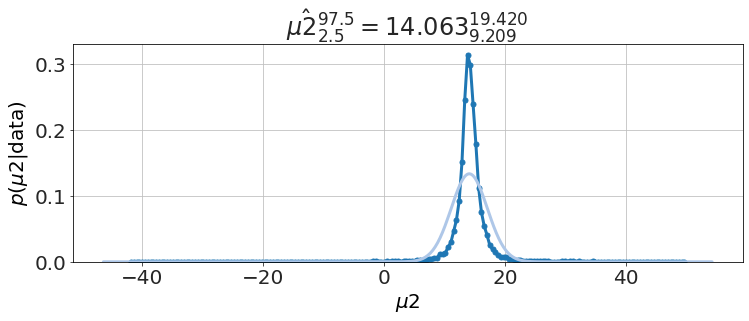

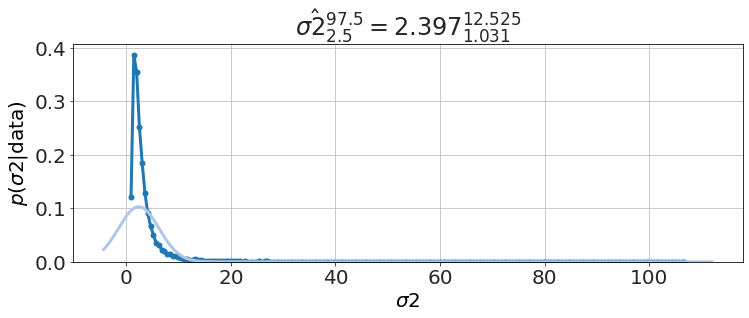

In [30]:
data=data1,data2
model = MCMCModel(data, lnlike,
                  μ1=Uniform(-50,50),
                  σ1=Jeffreys(),
                  μ2=Uniform(-50,50),
                  σ2=Jeffreys(),
                 )
model.run_mcmc(800,repeat=3)
model.plot_chains()
model.plot_distributions()

In [31]:
model.P('μ2>μ1')

0.9249

In [32]:
model.P('σ2>σ1')

0.7974333333333333

## paired

In [33]:
data1=array([10,11,12.])
data2=array([12,14.0,16])


In [34]:
def lnlike(data,μ,σ):
    x1,x2=data
    return lognormalpdf(x1-x2,μ,σ)
    

Sampling Prior...
Done.
0.41 s
Running MCMC 1/3...
Done.
2.43 s
Running MCMC 2/3...
Done.
2.46 s
Running MCMC 3/3...
Done.
2.59 s


<Figure size 720x576 with 0 Axes>

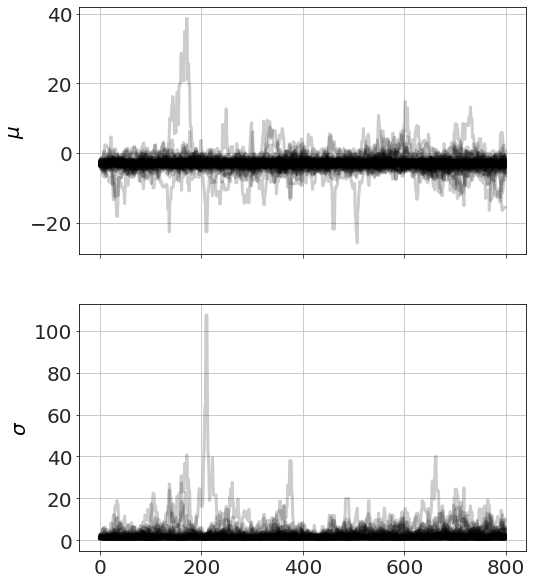

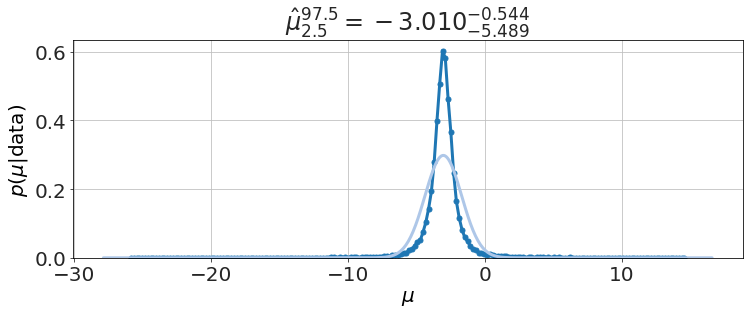

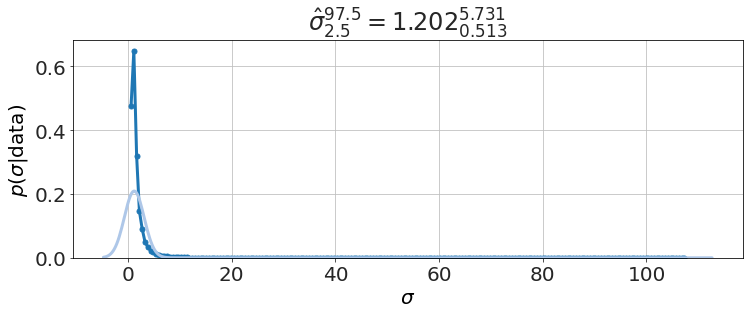

In [35]:
data=data1,data2
model = MCMCModel(data, lnlike,
                  μ=Uniform(-50,50),
                  σ=Jeffreys(),
                 )
model.run_mcmc(800,repeat=3)
model.plot_chains()
model.plot_distributions()